In [1]:
import numpy as np

In [2]:
def add_Intercept(X):
    new_X = np.zeros((X.shape[0], X.shape[1] + 1), dtype = X.dtype)
    new_X[:, 0] = 1
    new_X[:, 1:] = X
    
    return new_X

In [3]:
class LogisticRegression:
    
    def __init__(self, step_size = 0.01, epsilon = 1e-5):
        self.w = None
        self.step_size = step_size
        self.epsilon = epsilon
        
    def predict(self, X):
        if self.w.any() == None:
            raise Exception("Error. Model not trained yet.")
        
        z = np.matmul(self.w, np.transpose(X))
        return 1 / (1 + np.exp(-1 * z))
    
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        
        while True:
            y_pred = self.predict(X)
            gradient = ((y_pred - y) * np.transpose(X)).mean(axis = 1)
            hessian = np.matmul((y_pred * (1 - y_pred)) * np.transpose(X), X) / X.shape[0]
            difference = np.matmul(gradient, np.linalg.inv(hessian))
            self.w -= difference
            print(f"theta = {self.w}")
            
            if np.linalg.norm(difference) < self.epsilon:
                print("Training Complete.")
                return self

In [4]:
import pandas as pd
dataset1 = pd.read_csv("training_set1.csv")
dataset2 = pd.read_csv("training_set2.csv")

In [5]:
dataset1.head()

,x_1,x_2,y
0,0.411809,1.105525,0.0
1,1.274746,6.303314,0.0
2,0.115488,3.264251,0.0
3,-0.486306,0.279487,0.0
4,0.257625,1.212389,0.0


In [6]:
dataset2.head()

,x_1,x_2,y
0,1.259481,3.507940,0.0
1,0.922057,0.991203,0.0
2,0.278818,0.112071,0.0
3,1.518066,1.653732,0.0
4,-0.693938,0.685966,0.0


In [7]:
X_train1 = dataset1.iloc[:,:-1].values
X_train1 = add_Intercept(X_train1)

X_train2 = dataset2.iloc[:, :-1].values
X_train2 = add_Intercept(X_train2)

In [8]:
print(X_train1)

[[1.         0.41180854 1.10552487]
 [1.         1.27474554 6.30331401]
 [1.         0.11548828 3.26425138]
 ...
 [1.         0.96909526 4.51838094]
 [1.         1.95753102 6.08296767]
 [1.         2.02533402 2.72958809]]


In [9]:
print(X_train2)

[[1.         1.2594805  3.5079397 ]
 [1.         0.92205706 0.99120267]
 [1.         0.27881751 0.11207082]
 ...
 [1.         1.54410545 1.14987938]
 [1.         0.57546055 1.01725473]
 [1.         1.5608151  2.49184993]]


In [10]:
y_train1 = dataset1.iloc[:,-1].values
y_train2 = dataset2.iloc[:, -1].values

In [11]:
print(y_train1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [12]:
print(y_train2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [13]:
logReg1 = LogisticRegression()
logReg2 = LogisticRegression()

logReg1.fit(X_train1, y_train1)
print("--------------------------------------------------------------------------")
logReg2.fit(X_train2, y_train2)

theta = [-1.26793901  0.96347061  0.00651882]
theta = [-1.86435716  1.24798805  0.05047475]
theta = [-2.18133361  1.11955996  0.15388471]
theta = [-2.35903433  1.05025336  0.2244029 ]
theta = [-2.40601719  1.0350812   0.24374647]
theta = [-2.40859255  1.03437497  0.24480411]
theta = [-2.40859977  1.03437317  0.24480705]
Training Complete.
--------------------------------------------------------------------------
theta = [-1.31753187  0.53525994  0.52933008]
theta = [-1.89389091  0.77930294  0.75186982]
theta = [-2.08145792  0.85976023  0.82250651]
theta = [-2.09718588  0.8665384   0.82836402]
theta = [-2.09728529  0.86658135  0.82840081]
theta = [-2.09728529  0.86658136  0.82840081]
Training Complete.


In [14]:
dataset1 = pd.read_csv("dev_set1.csv")
dataset2 = pd.read_csv("dev_set2.csv")

In [15]:
dataset1.head()

,x_1,x_2,y
0,-0.322604,1.440160,0.0
1,1.452131,2.262743,0.0
2,0.851176,0.874618,0.0
3,-0.425066,0.494481,0.0
4,1.079775,4.152225,0.0


In [16]:
dataset2.head()

,x_1,x_2,y
0,-0.001299,0.743055,0.0
1,0.446555,-0.316970,0.0
2,0.114992,0.015235,0.0
3,0.084417,0.070436,0.0
4,2.836387,3.010116,0.0


In [17]:
X_valid1 = dataset1.iloc[:,:-1].values
X_valid2 = dataset2.iloc[:, :-1].values

In [18]:
print(X_valid1)

[[-0.3226045   1.44016009]
 [ 1.45213116  2.26274285]
 [ 0.85117646  0.87461786]
 [-0.42506633  0.49448067]
 [ 1.07977541  4.15222455]
 [ 0.06839514  3.60693507]
 [ 3.86229163 25.99079097]
 [ 0.63078087  0.69715553]
 [-0.64119999  0.07896407]
 [ 0.53135242  4.50417546]
 [ 2.19032426  6.54381687]
 [-0.38465533  0.42296288]
 [ 0.21679465  5.01812571]
 [ 0.4846679   1.36387124]
 [ 2.39608694 10.87208984]
 [-0.51197311  0.86848666]
 [ 0.61284557  1.92105571]
 [ 1.20247     1.39818937]
 [ 2.48716225  4.41633191]
 [ 0.27191322  2.48805513]
 [ 0.46650294  3.4560205 ]
 [-0.77155423  0.70674626]
 [ 0.74548073  0.78677636]
 [ 1.34588118  1.84466679]
 [ 0.03825659  1.37679837]
 [ 0.97144296  2.33499786]
 [ 0.73578508  5.36219354]
 [-0.98294485  0.60613226]
 [-1.06748414  0.51752952]
 [ 0.16444179  1.19318199]
 [-0.7898848   1.0424866 ]
 [-0.14329976  0.56735751]
 [-0.82024735  0.49960062]
 [ 0.66933574  2.03132583]
 [ 2.18580501  4.79542536]
 [ 1.24524603  2.22477477]
 [-0.38608243  1.17125926]
 

In [19]:
print(X_valid2)

[[-1.29853375e-03  7.43054970e-01]
 [ 4.46555477e-01 -3.16970383e-01]
 [ 1.14991812e-01  1.52351864e-02]
 [ 8.44173715e-02  7.04360579e-02]
 [ 2.83638733e+00  3.01011575e+00]
 [ 2.92089150e+00  2.37106753e+00]
 [ 7.79357813e-01  7.47045256e-01]
 [-1.88225309e+00 -1.12662595e+00]
 [ 5.37546308e-01  4.94076936e-01]
 [ 5.11061881e-01  2.41343016e-01]
 [-9.44780796e-02  7.14251674e-01]
 [ 2.77214309e-01 -1.58758152e-01]
 [ 2.16150446e+00  2.15542999e+00]
 [-2.47328249e-01  2.36446907e-02]
 [ 1.78585968e+00  2.77306884e+00]
 [-1.31345325e-01 -1.17128496e+00]
 [ 1.06714038e+00  3.44111626e-01]
 [-4.42019241e-01  9.10060258e-01]
 [ 7.17159861e-01  5.86266533e-01]
 [-3.39468208e-01 -3.77408746e-01]
 [ 2.83622092e-01  9.38803404e-02]
 [ 4.97420544e-02  9.58615253e-01]
 [-1.41946580e-01  2.94698429e-01]
 [-6.71502459e-01 -4.65644967e-01]
 [ 8.16820693e-01  1.58639277e-01]
 [ 8.32369692e-01  1.49364273e-01]
 [ 1.35556756e+00  5.15528509e-01]
 [ 4.21036606e-01 -5.87433340e-01]
 [ 1.17855297e-01 -2

In [20]:
y_valid1 = dataset1.iloc[:, -1].values
y_valid2 = dataset2.iloc[:, -1].values

In [21]:
print(y_valid1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [22]:
print(y_valid2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [23]:
import matplotlib.pyplot as plt

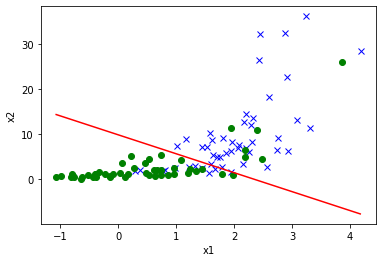

In [24]:
plt.figure()
plt.plot(X_valid1[y_valid1 == 1, 0], X_valid1[y_valid1 == 1, 1], 'bx')
plt.plot(X_valid1[y_valid1 == 0, 0], X_valid1[y_valid1 == 0, 1], 'go')

plt.xlabel("x1")
plt.ylabel("x2")

x = np.arange(min(X_valid1[:, 0]), max(X_valid1[:, 0]), 0.01)
w1 = logReg1.w
y = -1 * (w1[0] / w1[2] + w1[1] / w1[2] * x)

plt.plot(x,y, c = 'red')
plt.show()

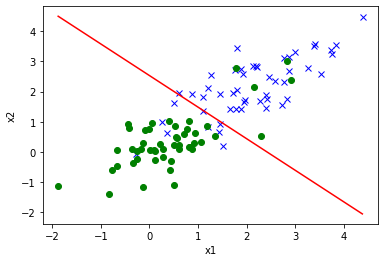

In [25]:
plt.figure()
plt.plot(X_valid2[y_valid2 == 1, 0], X_valid2[y_valid2 == 1, 1], 'bx')
plt.plot(X_valid2[y_valid2 == 0, 0], X_valid2[y_valid2 == 0, 1], 'go')

plt.xlabel("x1")
plt.ylabel("x2")

x = np.arange(min(X_valid2[:, 0]), max(X_valid2[:, 0]), 0.01)
w2 = logReg2.w
y = -1 * (w2[0]/w2[2] + w2[1]/w2[2] * x)

plt.plot(x, y, c = 'red')
plt.show()

In [26]:
y_pred1_valid = (logReg1.predict(add_Intercept(X_valid1)) >= 0.5).astype(np.int32)

count = 0
for i in range(len(y_valid1)):
    if y_pred1_valid[i] == y_valid1[i]:
        count += 1

print(f"Accuracy of model 1 on the dev set = {count / len(y_valid1) * 100}%")

Accuracy of model 1 on the dev set = 83.0%


In [27]:
y_pred1_train = (logReg1.predict(X_train1) >= 0.5).astype(np.int32)

count = 0
for i in range(len(y_train1)):
    if y_pred1_train[i] == y_train1[i]:
        count += 1
        
print(f"Accuracy of model 1 on the training set = {count/len(y_train1) * 100}%")

Accuracy of model 1 on the training set = 79.875%


In [28]:
y_pred2_valid = (logReg2.predict(add_Intercept(X_valid2)) >= 0.5).astype(np.int32)

count = 0
for i in range(len(y_valid2)):
    if y_pred2_valid[i] == y_valid2[i]:
        count += 1
        
print(f"Accuracy of model 2 on the dev set = {count/len(y_valid2) * 100}%")

Accuracy of model 2 on the dev set = 86.0%


In [29]:
y_pred2_train = (logReg2.predict(X_train2) >= 0.5).astype(np.int32)

count = 0
for i in range(len(y_train2)):
    if y_pred2_train[i] == y_train2[i]:
        count += 1
        
print(f"Accuracy of model 2 on the training set = {count/len(y_train2) * 100}%")

Accuracy of model 2 on the training set = 79.375%


In [30]:
np.savetxt("parameters1.txt", w1, delimiter = ", ")
np.savetxt("parameters2.txt", w2, delimiter = ", ")